<a href="https://colab.research.google.com/github/Bibitpamungkas/praktikumML_314_321/blob/Praktikum/Modul_4_Kelompok_Praktikum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
%cd /content/gdrive/MyDrive/content/sample_data/

[Errno 2] No such file or directory: '/content/gdrive/MyDrive/content/sample_data/'
/content


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/tmp/"

In [4]:
# jika anda ingin menggunakan kaggle API untuk mengunduh dataset gunakan
# kode berikut untuk membantu anda membuat config kaggle.json
# pastikan anda mendaftar akun kaggle terlebih dahulu
# kemudian menuju halaman my account dan buat token API anda

api_token = {"username":"bibitpamungkas","key":"0b4a500fd9a858ee152de296398002ab"}
import json
import zipfile
import os
with open('/tmp/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /tmp/kaggle.json

In [5]:
!kaggle datasets download -d jtiptj/chest-xray-pneumoniacovid19tuberculosis

100% 1.74G/1.74G [00:12<00:00, 132MB/s]
100% 1.74G/1.74G [00:12<00:00, 148MB/s]


In [6]:
# Ekstrak dataset

import os
import zipfile

os.makedirs('/tmp/chest-xray-pneumoniacovid19tuberculosis')

local_zip = '/content/chest-xray-pneumoniacovid19tuberculosis.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/chest-xray-pneumoniacovid19tuberculosis')
zip_ref.close()

In [7]:
import os
base_dir = '/tmp/chest-xray-pneumoniacovid19tuberculosis'
train = os.path.join(base_dir,'train')
validation = os.path.join(base_dir,'val')
test = os.path.join(base_dir,'test')

c19_tr = os.path.join(train,'COVID19')
c19_va = os.path.join(validation,'COVID19')
c19_ts = os.path.join(test,'COVID19')

nr_tr = os.path.join(train,'NORMAL')
nr_va = os.path.join(validation,'NORMAL')
nr_ts = os.path.join(test,'NORMAL')

pn_tr = os.path.join(train,'PNEUMONIA')
pn_va = os.path.join(validation,'PNEUMONIA')
pn_ts = os.path.join(test,'PNEUMONIA')

tb_tr = os.path.join(train,'TURBERCULOSIS')
tb_va = os.path.join(validation,'TURBERCULOSIS')
tb_ts = os.path.join(test,'TURBERCULOSIS')

#file training dan validation
file_train_c19 = os.listdir(c19_tr)
file_validation_c19 = os.listdir(c19_va)
file_test_c19 = os.listdir(c19_ts)
file_train_nr = os.listdir(nr_tr)
file_validation_nr = os.listdir(nr_va)
file_test_nr = os.listdir(nr_ts)
file_train_pn = os.listdir(pn_tr)
file_validation_pn = os.listdir(pn_va)
file_test_pn = os.listdir(pn_ts)
file_train_tb = os.listdir(tb_tr)
file_validation_tb = os.listdir(tb_va)
file_test_tb = os.listdir(tb_ts)

#Print jumlah data training dan validation
print("Data COVID19 Train : " + str(len(file_train_c19)))
print("Data COVID19 Validation : " + str(len(file_validation_c19)))
print("Data COVID19 Test : " + str(len(file_test_c19)))
print("Data NORMAL Train : " + str(len(file_train_nr)))
print("Data NORMAL Validation : " + str(len(file_validation_nr)))
print("Data NORMAL Test : " + str(len(file_test_nr)))
print("Data PNEUMONIA Train : " + str(len(file_train_pn)))
print("Data PNEUMONIA Validation : " + str(len(file_validation_pn)))
print("Data PNEUMONIA Test : " + str(len(file_test_pn)))
print("Data TURBERCULOSIS Train : " + str(len(file_train_tb)))
print("Data TURBERCULOSIS Validation : " + str(len(file_validation_tb)))
print("Data TURBERCULOSIS Test : " + str(len(file_test_tb)))

Data COVID19 Train : 460
Data COVID19 Validation : 10
Data COVID19 Test : 106
Data NORMAL Train : 1341
Data NORMAL Validation : 8
Data NORMAL Test : 234
Data PNEUMONIA Train : 3875
Data PNEUMONIA Validation : 8
Data PNEUMONIA Test : 390
Data TURBERCULOSIS Train : 650
Data TURBERCULOSIS Validation : 12
Data TURBERCULOSIS Test : 41


In [8]:
# TULIS KODE ANDA DISINI

from keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle

batch_size = 32
augmen_gen = ImageDataGenerator(rescale=1 / 255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest')

train_aug = augmen_gen.flow_from_directory(
    '/tmp/chest-xray-pneumoniacovid19tuberculosis/train',
    class_mode = 'categorical',
    shuffle=True,
    target_size = (250,250),
    batch_size=batch_size,
    color_mode ='rgb'
)

val_aug = augmen_gen.flow_from_directory(
    '/tmp/chest-xray-pneumoniacovid19tuberculosis/val',
    class_mode = 'categorical',
    shuffle=True,
    target_size = (250,250),
    batch_size= batch_size,
    color_mode ='rgb'
)

test_aug = augmen_gen.flow_from_directory(
    '/tmp/chest-xray-pneumoniacovid19tuberculosis/test',
    class_mode = 'categorical',
    shuffle=False,
    target_size = (250,250),
    batch_size=batch_size,
    color_mode ='rgb',
)

Found 6326 images belonging to 4 classes.
Found 38 images belonging to 4 classes.
Found 771 images belonging to 4 classes.


In [9]:
# TULIS KODE ANDA DISINI
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

# DEFINISIKAN MODEL ANDA DISINI

#Feature Selection
model = Sequential()

model.add(InputLayer(input_shape=[250,250,3]))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='elu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='elu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='elu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Flatten())

#Fully Connected Layer
model.add(Dense(128, activation='elu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 256)      0

In [10]:
# Compile model
#Semakin besar nilai learning rate, maka proses training akan berjalan semakin cepat. Semakin besar learning rate, maka ketelitian jaringan akan semakin berkurang, dan berlaku sebaliknya.
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.00001,decay=0.00001/32 ), # decay = learning_rate / batch_size 
              loss='categorical_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [11]:
H = model.fit(train_aug,steps_per_epoch=10, epochs=100, validation_data=test_aug, validation_steps=10, verbose=2)

Epoch 1/100
10/10 - 37s - loss: 1.6058 - acc: 0.4875 - val_loss: 1.4457 - val_acc: 0.1656 - 37s/epoch - 4s/step
Epoch 2/100
10/10 - 22s - loss: 1.3775 - acc: 0.5312 - val_loss: 1.2208 - val_acc: 0.4906 - 22s/epoch - 2s/step
Epoch 3/100
10/10 - 22s - loss: 1.1865 - acc: 0.6000 - val_loss: 1.3139 - val_acc: 0.3594 - 22s/epoch - 2s/step
Epoch 4/100
10/10 - 21s - loss: 1.1010 - acc: 0.5813 - val_loss: 1.1988 - val_acc: 0.3313 - 21s/epoch - 2s/step
Epoch 5/100
10/10 - 21s - loss: 1.0405 - acc: 0.6844 - val_loss: 1.1754 - val_acc: 0.2875 - 21s/epoch - 2s/step
Epoch 6/100
10/10 - 22s - loss: 0.9836 - acc: 0.7000 - val_loss: 0.9829 - val_acc: 0.7812 - 22s/epoch - 2s/step
Epoch 7/100
10/10 - 22s - loss: 0.9884 - acc: 0.6594 - val_loss: 0.9842 - val_acc: 0.7375 - 22s/epoch - 2s/step
Epoch 8/100
10/10 - 21s - loss: 0.9076 - acc: 0.6871 - val_loss: 0.9977 - val_acc: 0.6875 - 21s/epoch - 2s/step
Epoch 9/100
10/10 - 22s - loss: 0.8609 - acc: 0.7188 - val_loss: 1.0639 - val_acc: 0.5156 - 22s/epoch - 

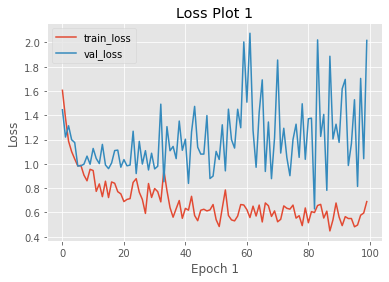

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot 1")
plt.xlabel("Epoch 1")
plt.ylabel("Loss")
plt.legend()
plt.show()

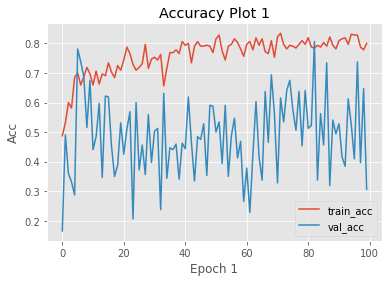

In [13]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot 1")
plt.xlabel("Epoch 1")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [25]:
from sklearn.metrics import classification_report
ypred = model.predict(test_aug)
prediction1 = np.argmax(ypred, axis=1)
print(classification_report(test_aug.classes, prediction1))

              precision    recall  f1-score   support

           0       0.86      0.29      0.44       106
           1       0.90      0.36      0.52       234
           2       0.73      0.93      0.82       390
           3       0.28      0.98      0.43        41

    accuracy                           0.67       771
   macro avg       0.69      0.64      0.55       771
weighted avg       0.78      0.67      0.65       771



In [15]:
import tensorflow as tf
model.save('model1.h5')
new_model = tf.keras.models.load_model('model1.h5')

# Show the model architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 256)      0

In [16]:
# TULIS KODE ANDA DISINI
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

# DEFINISIKAN MODEL ANDA DISINI

#Feature Selection
model1 = Sequential()

model1.add(InputLayer(input_shape=[250,250,3]))
model1.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='elu'))
model1.add(MaxPool2D(pool_size=2, padding='same'))
model1.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='elu'))
model1.add(MaxPool2D(pool_size=2, padding='same'))
model1.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='elu'))
model1.add(MaxPool2D(pool_size=2, padding='same'))
model1.add(Dropout(0.25))
model1.add(BatchNormalization())
model1.add(Flatten())

#Fully Connected Layer
model1.add(Dense(128, activation='elu'))
model1.add(Dropout(0.5))
model1.add(Dense(4, activation='softmax'))
print(model1.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 250, 250, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 125, 125, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 63, 63, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 128)     

In [17]:
# Compile model
from tensorflow.keras.optimizers import Adam

model1.compile(optimizer=Adam(lr=0.00001, decay=0.00001/32), 
              loss='categorical_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [18]:
H1 = model1.fit(train_aug,steps_per_epoch=10, epochs=100, validation_data=test_aug, validation_steps=10, verbose=2)

Epoch 1/100
10/10 - 24s - loss: 1.8016 - acc: 0.4563 - val_loss: 1.2288 - val_acc: 0.5406 - 24s/epoch - 2s/step
Epoch 2/100
10/10 - 20s - loss: 1.1638 - acc: 0.6125 - val_loss: 1.2648 - val_acc: 0.5375 - 20s/epoch - 2s/step
Epoch 3/100
10/10 - 20s - loss: 1.2106 - acc: 0.5906 - val_loss: 1.1134 - val_acc: 0.8188 - 20s/epoch - 2s/step
Epoch 4/100
10/10 - 20s - loss: 1.0370 - acc: 0.6531 - val_loss: 1.0547 - val_acc: 0.7125 - 20s/epoch - 2s/step
Epoch 5/100
10/10 - 21s - loss: 1.0079 - acc: 0.6469 - val_loss: 1.0532 - val_acc: 0.8469 - 21s/epoch - 2s/step
Epoch 6/100
10/10 - 20s - loss: 0.8425 - acc: 0.7125 - val_loss: 1.0853 - val_acc: 0.6062 - 20s/epoch - 2s/step
Epoch 7/100
10/10 - 20s - loss: 0.9125 - acc: 0.6719 - val_loss: 1.0254 - val_acc: 0.7656 - 20s/epoch - 2s/step
Epoch 8/100
10/10 - 20s - loss: 0.8168 - acc: 0.7031 - val_loss: 0.9878 - val_acc: 0.7344 - 20s/epoch - 2s/step
Epoch 9/100
10/10 - 20s - loss: 0.8539 - acc: 0.6562 - val_loss: 0.9751 - val_acc: 0.7000 - 20s/epoch - 

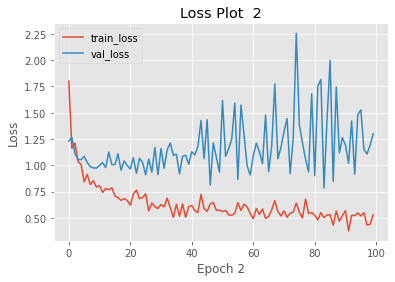

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H1.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H1.history["val_loss"], label="val_loss")
plt.title("Loss Plot  2")
plt.xlabel("Epoch 2")
plt.ylabel("Loss")
plt.legend()
plt.show()

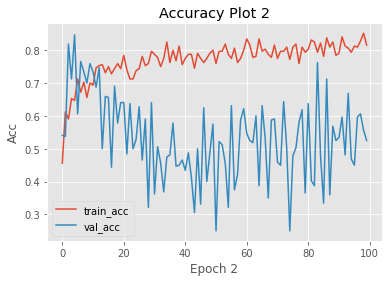

In [20]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H1.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H1.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot 2")
plt.xlabel("Epoch 2")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import classification_report
ypred = model1.predict(test_aug)
prediction2 = np.argmax(ypred, axis=1)
print(classification_report(test_aug.classes, prediction2))

              precision    recall  f1-score   support

           0       0.86      0.67      0.75       106
           1       0.91      0.46      0.61       234
           2       0.73      0.97      0.84       390
           3       0.63      0.80      0.71        41

    accuracy                           0.77       771
   macro avg       0.78      0.73      0.73       771
weighted avg       0.80      0.77      0.75       771



In [22]:
import tensorflow as tf
model1.save('model2.h5')
new_model1 = tf.keras.models.load_model('model2.h5')

# Show the model architecture
new_model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 250, 250, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 125, 125, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 63, 63, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 128)     